In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

path="https://raw.githubusercontent.com/DeboraMandon/video_game_sales_analysis/main/vgsales.csv"
df=pd.read_csv(path, index_col=0)
df.head()



,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [3]:
# TYPE DE VARIABLE

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB
None


In [4]:
var_cat=['Name', 'Platform','Genre', 'Publisher']
var_num=['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales','Global_Sales']

In [5]:
# TAUX DE NA

print(df.isna().sum())
#pourcentage de valeur nulle pour la variable Year
Year_Na=(df['Year'].isna().sum())/(len(df['Year']))
Year_Na=Year_Na*100
print('Year',round(Year_Na,2),'%')

#pourcentage de valeur nulle pour la variable Publisher
Year_Na=(df['Publisher'].isna().sum())/(len(df['Publisher']))
Year_Na=Year_Na*100
print('Publisher',round(Year_Na,2),'%')

Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64
Year 1.63 %
Publisher 0.35 %


In [6]:
# DISTRIBUTION DES VALEURS

print(df.describe())
print(df.describe(include='O'))

               Year      NA_Sales      EU_Sales      JP_Sales   Other_Sales  \
count  16327.000000  16598.000000  16598.000000  16598.000000  16598.000000   
mean    2006.406443      0.264667      0.146652      0.077782      0.048063   
std        5.828981      0.816683      0.505351      0.309291      0.188588   
min     1980.000000      0.000000      0.000000      0.000000      0.000000   
25%     2003.000000      0.000000      0.000000      0.000000      0.000000   
50%     2007.000000      0.080000      0.020000      0.000000      0.010000   
75%     2010.000000      0.240000      0.110000      0.040000      0.040000   
max     2020.000000     41.490000     29.020000     10.220000     10.570000   

       Global_Sales  
count  16598.000000  
mean       0.537441  
std        1.555028  
min        0.010000  
25%        0.060000  
50%        0.170000  
75%        0.470000  
max       82.740000  
                               Name Platform   Genre        Publisher
count               

In [7]:
# ETENDUE DES VALEURS

print(df['Platform'].unique())
print(df['Year'].unique())
print(df['Genre'].unique())

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
[2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2003. 1986. 2000.   nan 1995. 2016. 1991. 1981. 1987.
 1980. 1983. 2020. 2017.]
['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy']


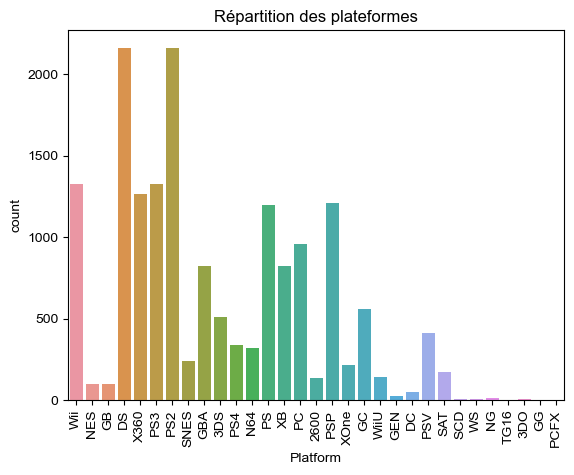

In [8]:
# RELATION ENTRE LES VALEURS

sns.countplot(x=df['Platform'])
sns.set_theme(style="darkgrid")

plt.xticks(rotation=90)
plt.title("Répartition des plateformes");

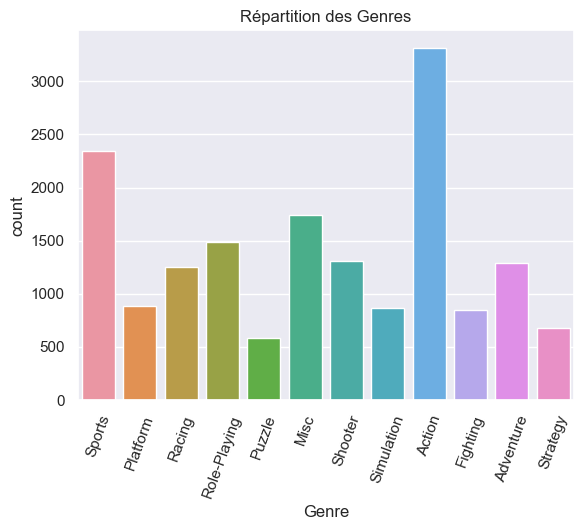

In [9]:
sns.countplot(x=df['Genre'])
sns.set_theme(style="darkgrid")

plt.xticks(rotation=70)
plt.title("Répartition des Genres");

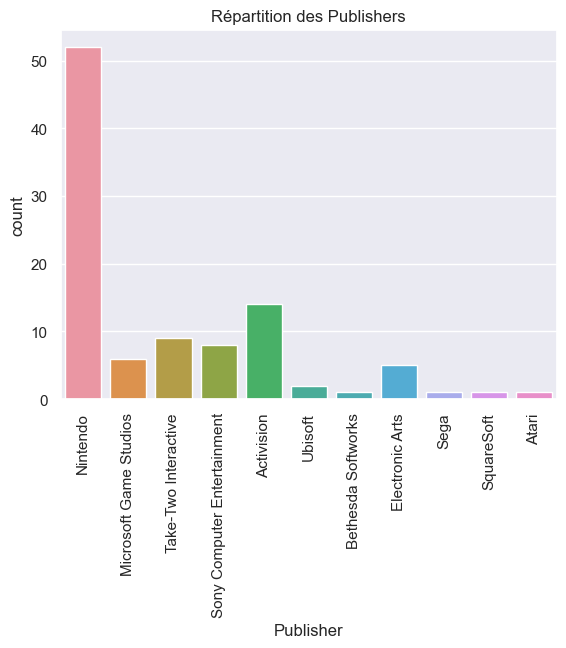

In [10]:
sns.countplot(x=df['Publisher'][:100])
sns.set_theme(style="darkgrid")

plt.xticks(rotation=90)
plt.title("Répartition des Publishers");

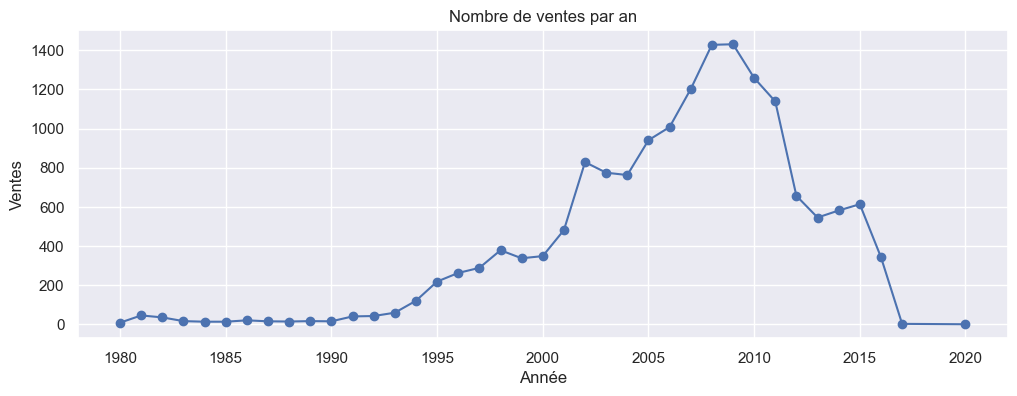

In [11]:
# ETUDE DE LA VARIABLE ANNEE

df['Year']=pd.to_datetime(df['Year'], format='%Y')

values = df['Year'].value_counts().sort_index()

plt.figure(figsize=(12, 4))
plt.plot_date(values.index, values, linestyle='-')
plt.xlabel('Année')
plt.ylabel('Ventes')
plt.title("Nombre de ventes par an");

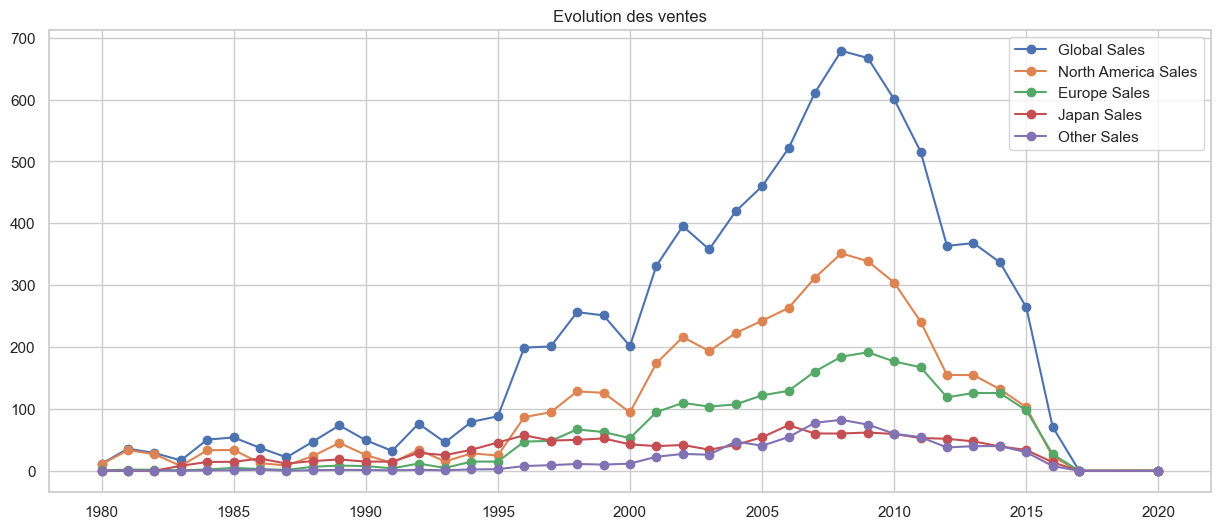

In [12]:

# ETUDE DES VARIABLES NUMERIQUES

for i in var_num:
    df['cat_'+i]=pd.qcut(df[i], q=[0,.25,.5,.75,1.], duplicates='drop')

df['Year']=pd.to_datetime(df['Year'], format='%Y')

sales_per_year=df.groupby('Year', as_index=False).agg({'NA_Sales':sum, 'EU_Sales':sum, 'JP_Sales':sum, 'Other_Sales':sum,'Global_Sales':sum})

sns.set(style="whitegrid")
plt.figure(figsize=(15,6))
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Global_Sales'].values,
              xdate=True,
              ls='-',
              label='Global Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['NA_Sales'].values,
              xdate=True,
              ls='-',
              label='North America Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['EU_Sales'].values,
              xdate=True,
              ls='-',
              label='Europe Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['JP_Sales'].values,
              xdate=True,
              ls='-',
              label='Japan Sales')
plt.plot_date(x=sales_per_year['Year'].values,
              y=sales_per_year['Other_Sales'].values,
              xdate=True,
              ls='-',
              label='Other Sales')
plt.legend(loc='best')
plt.title('Evolution des ventes')
plt.show();

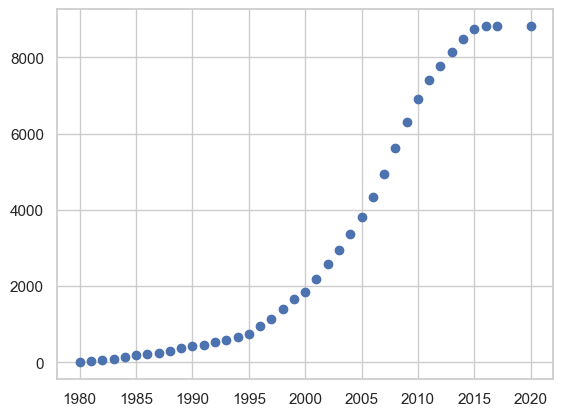

In [13]:
# ANALYSE DE LA TENDANCE DES VENTES GLOBALES

# Calcul des ventes totales
total_sales = df.groupby('Year')['Global_Sales'].sum()

# Calcul des ventes totales cumulées
cumulative_total_sales = total_sales.cumsum()

# Affichage de la série temporelle
plt.plot_date(cumulative_total_sales.index, cumulative_total_sales.values);

c:\Users\debor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\debor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\debor\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

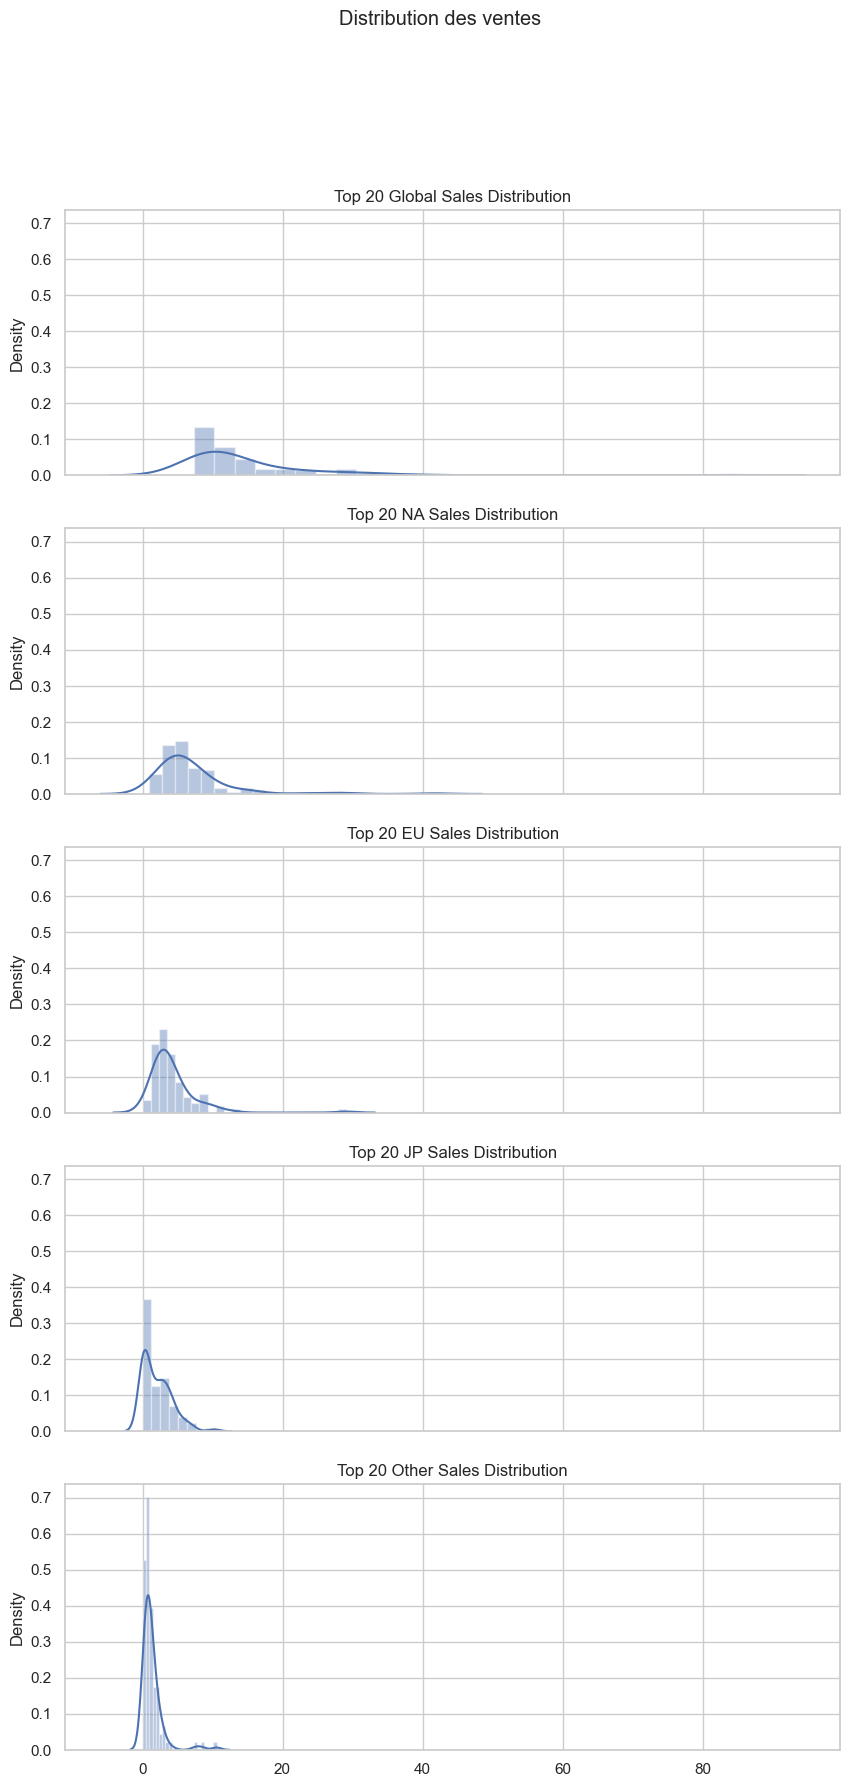

In [14]:
# ETUDE DES VARIABLES NUMERIQUES

fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=5, ncols=1, figsize=(10,20),sharex=True, sharey=True)

sns.distplot(x=df['Global_Sales'].head(100), ax=ax1);
ax1.set_title('Top 20 Global Sales Distribution')

sns.distplot(x=df['NA_Sales'].head(100), ax=ax2);
ax2.set_title('Top 20 NA Sales Distribution')

sns.distplot(x=df['EU_Sales'].head(100), ax=ax3);
ax3.set_title('Top 20 EU Sales Distribution')

sns.distplot(x=df['JP_Sales'].head(100), ax=ax4);
ax4.set_title('Top 20 JP Sales Distribution')

sns.distplot(x=df['Other_Sales'].head(100), ax=ax5);
ax5.set_title('Top 20 Other Sales Distribution');

fig.suptitle('Distribution des ventes');



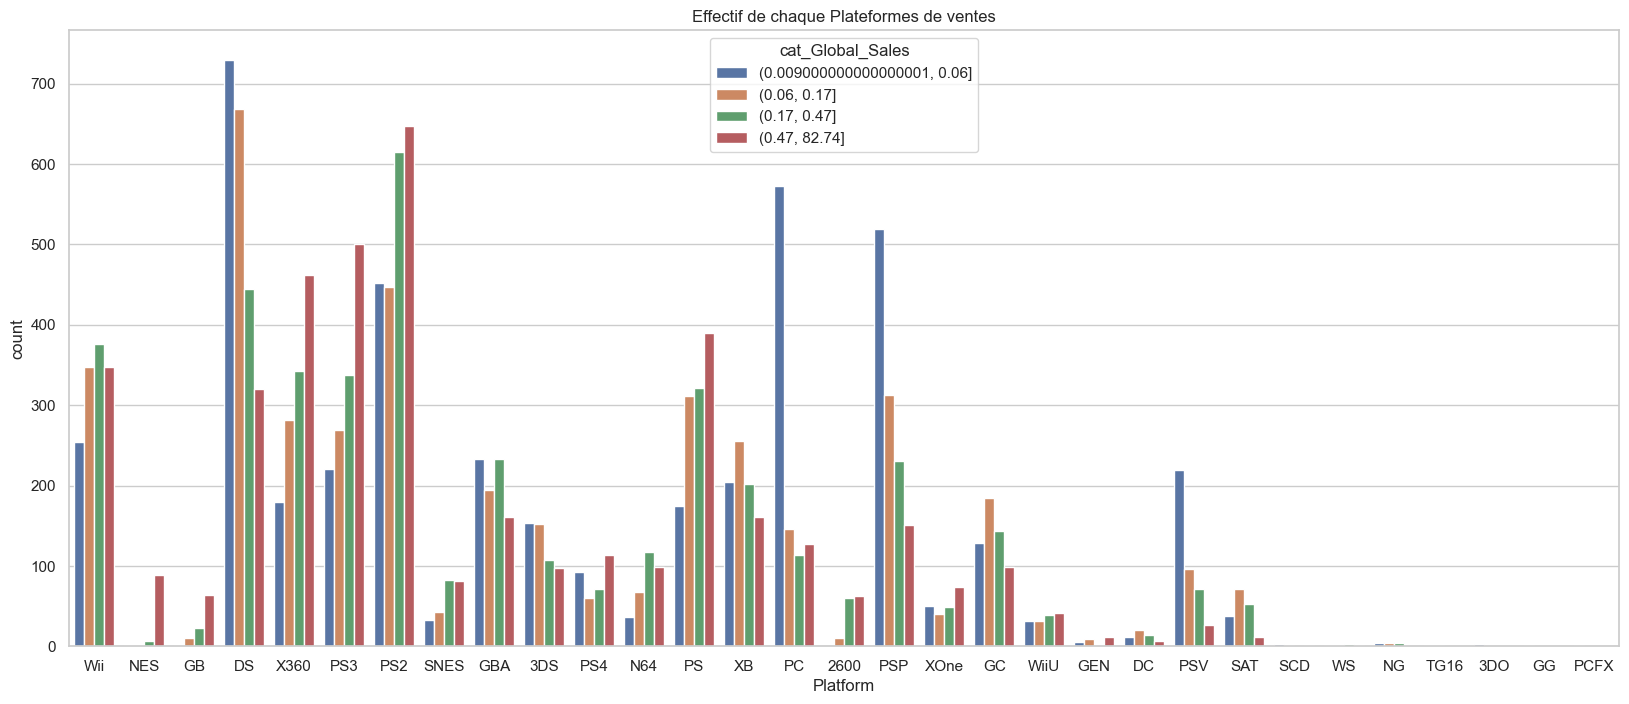

In [15]:
#PLATEFORMES

plt.figure(figsize=(20,8))
plt.title('Effectif de chaque Plateformes de ventes')

sns.countplot(x = 'Platform', hue = 'cat_Global_Sales', data = df);

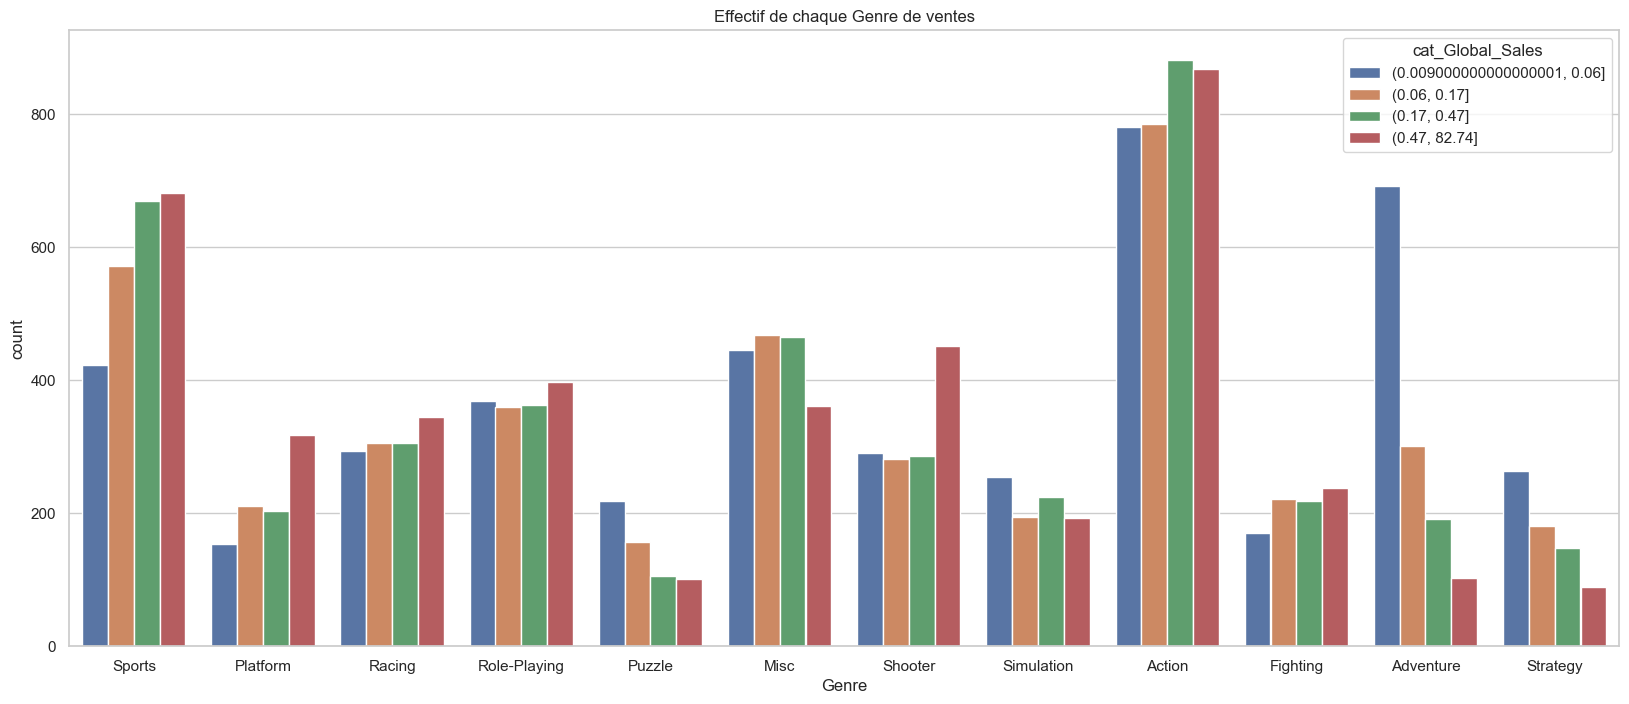

In [16]:
#GENRE

plt.figure(figsize=(20,8))
plt.title('Effectif de chaque Genre de ventes')

sns.countplot(x = 'Genre', hue = 'cat_Global_Sales', data = df);

In [24]:
# TEST DE CORRELATION ENTRE LES VARIABLES NUMERIQUES
from pandas.plotting import scatter_matrix
%matplotlib inline

df.corr()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
NA_Sales,1.000000,0.767727,0.449787,0.634737,0.941047
EU_Sales,0.767727,1.000000,0.435584,0.726385,0.902836
JP_Sales,0.449787,0.435584,1.000000,0.290186,0.611816
Other_Sales,0.634737,0.726385,0.290186,1.000000,0.748331
Global_Sales,0.941047,0.902836,0.611816,0.748331,1.000000


In [30]:
# TEST DE CORRELATION ENTRE LES VARIABLES QUALITATIVES
table = pd.crosstab(df['Genre'], df['Publisher'])

table

Publisher,10TACLE Studios,1C Company,20th Century Fox Video Games,2D Boy,3DO,49Games,505 Games,5pb,7G//AMES,989 Sports,...,Zushi Games,bitComposer Games,dramatic create,fonfun,iWin,id Software,imageepoch Inc.,inXile Entertainment,"mixi, Inc",responDESIGN
Genre,,,,,,,,,,,,,,,,,,,,,
Action,0,0,4,0,17,0,21,5,0,0,...,1,0,1,0,0,0,0,0,1,0
Adventure,1,0,0,0,3,0,7,49,0,0,...,1,0,4,0,0,0,1,0,0,0
Fighting,0,0,0,0,1,0,11,1,0,0,...,0,0,0,0,0,0,0,0,0,0
Misc,0,0,0,0,0,0,31,0,1,0,...,1,0,0,0,0,0,0,0,0,0
Platform,0,0,0,0,1,0,6,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Puzzle,1,0,0,1,1,0,15,0,1,0,...,2,0,0,0,1,0,0,0,0,0
Racing,0,1,0,0,0,0,2,0,0,0,...,3,1,0,0,0,0,0,0,0,0
Role-Playing,0,1,0,0,1,0,10,1,0,0,...,1,0,0,0,0,0,1,1,0,0
Shooter,0,0,1,0,5,0,18,3,0,0,...,2,0,0,0,0,1,0,0,0,0


In [31]:
from scipy.stats import chi2_contingency

resultat_chi = chi2_contingency(table)
resultat_chi
statistique = resultat_chi[0]
p_valeur = resultat_chi[1]
degre_liberte = resultat_chi[2]

print("stat :", statistique, ", p-value :", p_valeur, ", degré de liberté :", degre_liberte)
# p-value < 5% donc on rejette H0"

stat : 25587.348135120996 , p-value : 0.0 , degré de liberté : 6347


In [32]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table, df.shape[0])
#Le V_Cramer > 5%, on ne rejette pas H0.
# On en déduit qu'il y a une corrélation entre les 2 variables qui n'est pas négligeable.

0.32472960980732374

In [35]:
# TEST DE CORRELATION ENTRE LES VARIABLES QUALITATIVES ET QUALITATIVES

import statsmodels.api 
result = statsmodels.formula.api.ols('Genre ~ Global_Sales', data=df).fit()
table2 = statsmodels.api.stats.anova_lm(result)

table2


ValueError: endog has evaluated to an array with multiple columns that has shape (16598, 12). This occurs when the variable converted to endog is non-numeric (e.g., bool or str).